# Aprendizaje Supervisado - kNN

Este es un clasificador basado en las instancias en que el no se aprende o se crea un modelo generalizado de los datos, sino que se crean modelos locales a demanda con base en los vecinos de un punto a evaluar.

![kNN](imagenes/kNN.jpg)

# Un ejemplo de kNN: 

Problema: determinar si una persona comprará o no un producto con base en su salario y edad.

In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sea #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn.neighbors import KNeighborsClassifier # Algoritmo kNN para clasificación
from sklearn.preprocessing import StandardScaler #Escalamiento de los datos con media cero y desviación 1
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos


## 1. Lectura del conjunto de datos

Iniciamos cargando el conjunto de datos el cual están en format CSV.

In [2]:
#Leemos el conjunto de datos como un DataFrame
dataset = pd.read_csv('datos/Social_Network_Ads.csv')

## 2. Exploración del conjunto de datos

En la exploración debemos tratar de conocer el conjunto de datos. Primero veamos sus dimensiones.

In [3]:
#Inciamos mostrando las dimensiones del conjunto de datos
dataset.shape

(400, 5)

La salida anterior nos indica que el conjunto de datos tiene 400 filas y 5 columnas. Ahora veamos las primeras filas del conjunto de datos.

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 3. Obteniendo la matriz de datos y el vector de etiquetas

Lo siguiente es dividir los datos que corresponden a las variables independietes (X) y la variable dependiente (y). Así la variable X contiene todos los atributos (o características) y la variable y contiene las etiquetas.

In [5]:
X = dataset.values[:,2:4]
y = dataset.values[:,4].astype(int)

Veámos el histograma de frecuencias de las compras y no-compras (nuestra variable objetivo)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


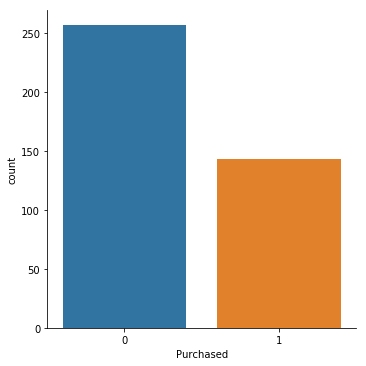

In [6]:
sea.factorplot('Purchased', data=dataset, kind="count")

Veamos como están distribuídas las clases con base en las 2 variables que usaremos para la clasificación

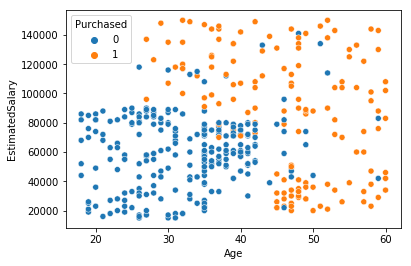

In [7]:
sea.scatterplot(data=dataset, x="Age", y="EstimatedSalary", hue="Purchased")

## 4. Particionamiento del conjunto de datos

Ahora dividimos el conjunto usando el 80% de los datos para entrenamiento y 20% para probar el modelo que se genera.

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

## 5. Escalamos los datos

En los algoritmos de aprendizaje basados en distancias es importante escalar los datos para evitar que la dimensión con mayor escala domine la distancia.

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 6. Entrenamiento del modelo

Ahora procedemos a entrenar el modelo de regresión simple.

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## 7. Evaluación del modelo entrenado

Probamos el modelo en el conjunto de datos de prueba

In [24]:
#Clasificamos los datos de prueba
y_pred = classifier.predict(X_test)

In [25]:
#Mostramos la precision
print('Accuray:', metrics.accuracy_score(y_test, y_pred))

Accuray: 0.95


## 8. Visualicemos las fronteras de decisión

Visualizamos las fronteras de decisión para este clasificador

In [27]:
from matplotlib.colors import ListedColormap

def visualizar_clasificador(clf, X, y, ax):
    # Grafiquemos las superficies de decisión
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=30)


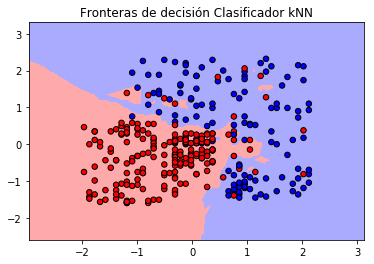

In [34]:
f = plt.figure()
ax = plt.gca()
visualizar_clasificador(classifier, X_train, y_train, ax)
ax.set_title('Fronteras de decisión Clasificador kNN')
plt.show()

In [ ]:
from sklearn import discriminant_analysis  # LDA & QDA

#Especificamos los modelos a usar LDA y QDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Entrenamos los modelos
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

In [ ]:
f = plt.figure()
ax = plt.gca()
visualizar_clasificador(lda, X_train, y_train, ax)

In [ ]:
f = plt.figure()
ax = plt.gca()
visualizar_clasificador(qda, X_train, y_train, ax)